# DBSCAN Clustering in ML | Density based clustering

Clustering analysis or simply Clustering is basically an Unsupervised learning method that divides the data points into a number of specific batches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense. It comprises of many different methods based on different evolution.
E.g. K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance) etc.<br>

Fundamentally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on Density-based spatial clustering of applications with noise (DBSCAN) clustering method.<br>

Clusters are dense regions in the data space, separated by regions of the lower density of points. The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points.<br>
<img src="Images/dbscan.png">

## Disadvantage Of K-MEANS:
<ol>
    <li>K-Means forms spherical clusters only. This algorithm fails when data is not spherical ( i.e. same variance in all directions).</li>
    <img src="Images/dbscan6.png">
    <li>K-Means algorithm is sensitive towards outlier. Outliers can skew the clusters in K-Means in very large extent.</li>
    <img src="Images/dbscan7.png">
    <li>-Means algorithm requires one to specify the number of clusters a priory etc.</li>
</ol>
    Basically, DBSCAN algorithm overcomes all the above-mentioned drawbacks of K-Means algorithm. DBSCAN algorithm identifies the dense region by grouping together data points that are closed to each other based on distance measurement.<br>
    
## Why DBSCAN ?
Partitioning methods (K-means, PAM clustering) and hierarchical clustering work for finding spherical-shaped clusters or convex clusters. In other words, they are suitable only for compact and well-separated clusters. Moreover, they are also severely affected by the presence of noise and outliers in the data.<br><br>

Real life data may contain irregularities, like –
i) Clusters can be of arbitrary shape such as those shown in the figure below.
ii) Data may contain noise.
<img src="Images/dbscan2.png">

The figure below shows a data set containing nonconvex clusters and outliers/noises. Given such data, k-means algorithm has difficulties for identifying these clusters with arbitrary shapes.

### DBSCAN algorithm requires two parameters –

1) eps : It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered as neighbors. If the eps value is chosen too small then large part of the data will be considered as outliers. If it is chosen very large then the clusters will merge and majority of the data points will be in the same clusters. One way to find the eps value is based on the k-distance graph.

2) MinPts: Minimum number of neighbors (data points) within eps radius. Larger the dataset, the larger value of MinPts must be chosen. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value of MinPts must be chosen at least 3.

### In this algorithm, we have 3 types of data points.

1) Core Point: A point is a core point if it has more than MinPts points within eps.<br>
2) Border Point: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point.<br>
3) Noise or outlier: A point which is not a core point or border point.<br>

<img src="Images/dbscan3.png">

### DBSCAN algorithm can be abstracted in the following steps

1)    Find all the neighbor points within eps and identify the core points or visited with more than MinPts neighbors.<br>
2)    For each core point if it is not already assigned to a cluster, create a new cluster.<br>
3)    Find recursively all its density connected points and assign them to the same cluster as the core point.<br>
4)   A point a and b are said to be density connected if there exist a point c which has a sufficient number of points in its neighbors and both the points a and b are within the eps distance. This is a chaining process. So, if b is neighbor of c, c is neighbor of d, d is neighbor of e, which in turn is neighbor of a implies that b is neighbor of a.<br>
5)   Iterate through the remaining unvisited points in the dataset. Those points that do not belong to any cluster are noise.<br>

#### Below is the DBSCAN clustering algorithm in pseudocode
<img src="Images/dbscan4.png">

#### DBSCAN has three main parameters to set:
1) eps: The maximum distance from an observation for anotherobservation to be considered its neighbor.<br>
2) min_samples: The minimum number of observations less than eps distancefrom an observation for it to be considered a core observation.<br>
3) metric: The distance metric used by eps—for example, minkowski oreuclidean (note that if Minkowski distance is used, theparameter p can be used to set the power of the Minkowskimetric).<br>

In [1]:
from sklearn.datasets import load_iris
x = load_iris()['data']
y = load_iris()['target']

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [6]:
from sklearn.cluster import DBSCAN

# Create meanshift object
cluster=DBSCAN(n_jobs=-1)

# Train model
model=cluster.fit(x)

If we look at the clusters in our training data we can see two clustershave been identified, 0 and 1, while outlier observations are labeled -1

In [7]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

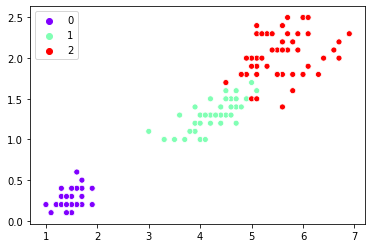

In [8]:
sns.scatterplot(x[:,2],x[:,3],hue=y,palette='rainbow')

### But on iris dataset, it has not performed very well. So take precautions before performing DBSCAN

Text(0.5, 1.0, 'Original')

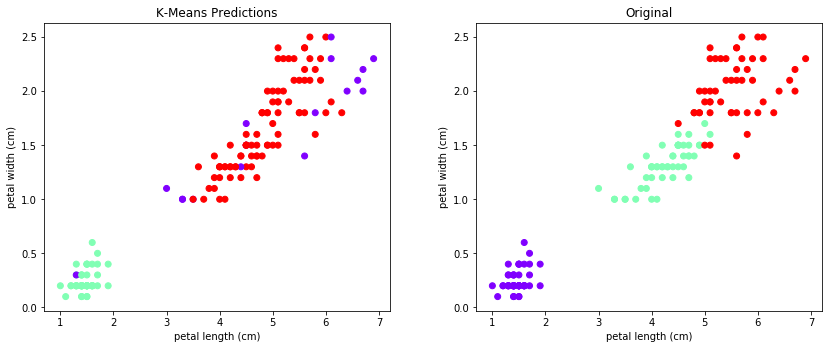

In [9]:
ax1 = plt.axes((0,0,0.8,1))
ax1.scatter(x[:,2],x[:,3],c=model.labels_, cmap = 'rainbow')
ax1.set_xlabel(load_iris()['feature_names'][2])
ax1.set_ylabel(load_iris()['feature_names'][3])
ax1.set_title("K-Means Predictions")

ax2 = plt.axes((1,0,0.8,1))
ax2.scatter(x[:,2],x[:,3],c=y, cmap = 'rainbow')
ax2.set_xlabel(load_iris()['feature_names'][2])
ax2.set_ylabel(load_iris()['feature_names'][3])
ax2.set_title("Original")

# Example 2

In [13]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

x = pd.read_csv('Data/credit_card.csv') 
  
# Dropping the CUST_ID column from the data 
x = x.drop('CUST_ID', axis = 1) 
  
# Handling the missing values 
x.fillna(method ='ffill', inplace = True) 
  
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(x) 

# Normalizing the data so that 
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 

# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 


pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

#getting the head of X_principal
X_principal.head() 

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544828
2,0.330633,0.268877
3,-0.481656,-0.097609
4,-0.563512,-0.482506


In [31]:
# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal) 
labels = db_default.labels_ 

In [32]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

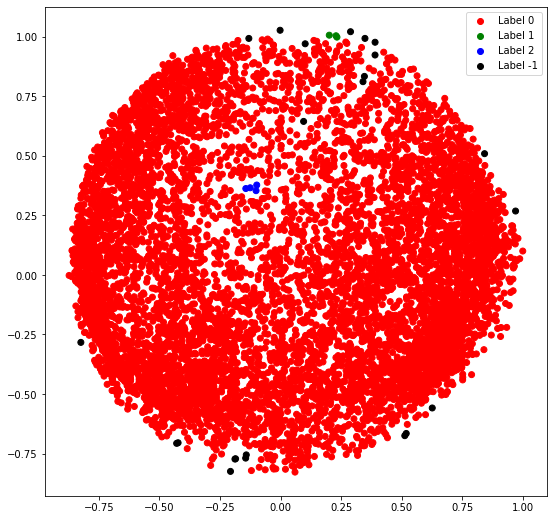

In [36]:
# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 

# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 

# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)